In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("../Data/Preprocessed/train_data.csv")

In [3]:
df['ofd_date'] = pd.to_datetime(df['ofd_date'], format = "%Y-%m-%d")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11309 entries, 0 to 11308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ofd_date      11309 non-null  datetime64[ns]
 1   country_code  11309 non-null  object        
 2   fc_codes      11309 non-null  object        
 3   station_code  11309 non-null  object        
 4   OFD           11309 non-null  int64         
 5   Slam          11309 non-null  int64         
 6   Earlies_Exp   11309 non-null  int64         
 7   Earlies_Rec   11309 non-null  int64         
 8   MNR_SNR_Exp   11309 non-null  int64         
 9   Rollover      11309 non-null  int64         
 10  Returns       11309 non-null  int64         
 11  R_Sideline    11309 non-null  int64         
 12  Sideline      11309 non-null  int64         
 13  weekday       11309 non-null  int64         
 14  week_no       11309 non-null  int64         
dtypes: datetime64[ns](1), int64(11), obj

In [5]:
df["OFD_Expected"] = df["Slam"] + df["Earlies_Exp"] - df["Earlies_Rec"] - df["MNR_SNR_Exp"] + df["Rollover"] + df["Returns"] + df["R_Sideline"] - df["Sideline"]

In [6]:
df["other"] = df["OFD"] - df["OFD_Expected"]

In [7]:
cols = list(df.columns[:-2])

In [8]:
cols.insert(2,"OFD_Expected")
cols.insert(3,"other")

In [9]:
df = df[cols]

In [10]:
df

,ofd_date,country_code,OFD_Expected,other,fc_codes,station_code,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,Sideline,weekday,week_no
0,2021-06-30,C,14639,-45,"F6, F8, F14, F17",D33,14594,14568,782,896,615,767,35,2,4,2,26
1,2021-06-30,C,12779,-43,"F6, F8, F9, F14, F17, F18",D37,12736,13111,655,823,211,29,17,2,1,2,26
2,2021-06-30,C,14628,-66,"F1, F4, F6, F7, F13, F15, F16",D34,14562,15651,1028,1910,225,35,47,3,1,2,26
3,2021-06-30,C,11223,-58,"F2, F6, F7, F10, F12, F13, F14, F15, F19",D45,11165,11467,514,769,56,39,29,0,1,2,26
4,2021-06-30,C,10053,-47,"F6, F8, F13, F14, F17",D50,10006,10423,399,842,52,60,65,1,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,2021-02-01,D,16088,-63,"F35, F37, F38, F39, F40, F42, F43, F44, F46, F...",D60,16025,15768,487,383,62,69,195,15,1,0,5
11305,2021-02-01,D,19104,-118,"F35, F36, F37, F38, F39, F40, F42, F43, F44, F...",D54,18986,18861,318,446,83,100,107,248,1,0,5
11306,2021-02-01,D,12510,-31,"F35, F48, F52, F53, F54, F56",D69,12479,12345,163,196,64,64,62,136,0,0,5
11307,2021-02-01,D,16838,-10,"F35, F36, F40, F42, F43, F46, F48, F49, F52, F...",D59,16828,16504,248,333,83,135,112,256,1,0,5


<AxesSubplot:xlabel='ofd_date'>

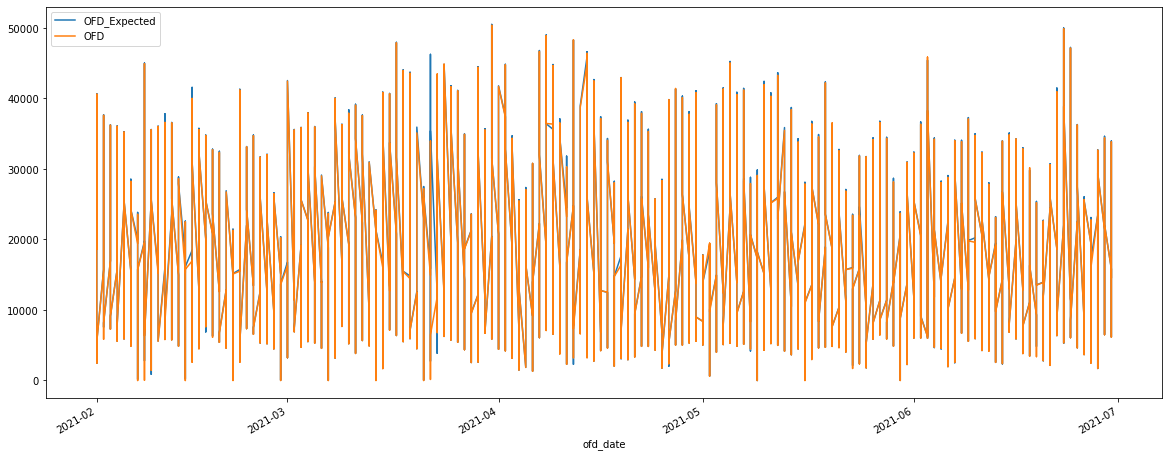

In [11]:
df.plot(x="ofd_date", y=["OFD_Expected","OFD"], figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

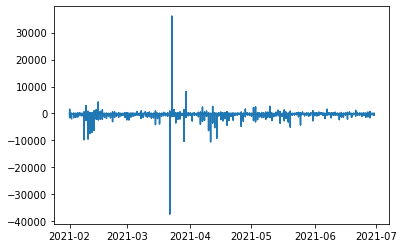

<Figure size 1440x576 with 0 Axes>

In [12]:
plt.plot(df["ofd_date"], df["OFD"] - df["OFD_Expected"])
plt.figure(figsize=(20,8))

In [13]:
def outlier_point_highlight(col, outlier_indices):
    outliers = np.empty(len(col))
    outliers[:] = np.nan
    for i,outlier_index in enumerate(outlier_indices):
        if outlier_index == -1:
            outliers[i] = col[i]
    return outliers

In [14]:
cols = list(df.columns[7:15]) + list(df.columns[2:4])
print(cols)
for col in cols:
    outlier_indices = IsolationForest(contamination=0.03, random_state=42).fit_predict(df[col].values.reshape(-1,1))
    outliers = outlier_point_highlight(df[col].values, outlier_indices)
    df[col] = df[col].where(~df[col].isin(outliers), np.nan)

['Slam', 'Earlies_Exp', 'Earlies_Rec', 'MNR_SNR_Exp', 'Rollover', 'Returns', 'R_Sideline', 'Sideline', 'OFD_Expected', 'other']


In [15]:
df = df.dropna().reset_index().drop(labels="index", axis=1)

In [16]:
df

,ofd_date,country_code,OFD_Expected,other,fc_codes,station_code,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,Sideline,weekday,week_no
0,2021-06-30,C,14639.0,-45.0,"F6, F8, F14, F17",D33,14594,14568.0,782.0,896.0,615.0,767.0,35.0,2.0,4.0,2,26
1,2021-06-30,C,12779.0,-43.0,"F6, F8, F9, F14, F17, F18",D37,12736,13111.0,655.0,823.0,211.0,29.0,17.0,2.0,1.0,2,26
2,2021-06-30,C,14628.0,-66.0,"F1, F4, F6, F7, F13, F15, F16",D34,14562,15651.0,1028.0,1910.0,225.0,35.0,47.0,3.0,1.0,2,26
3,2021-06-30,C,11223.0,-58.0,"F2, F6, F7, F10, F12, F13, F14, F15, F19",D45,11165,11467.0,514.0,769.0,56.0,39.0,29.0,0.0,1.0,2,26
4,2021-06-30,C,10053.0,-47.0,"F6, F8, F13, F14, F17",D50,10006,10423.0,399.0,842.0,52.0,60.0,65.0,1.0,1.0,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,2021-02-01,D,16088.0,-63.0,"F35, F37, F38, F39, F40, F42, F43, F44, F46, F...",D60,16025,15768.0,487.0,383.0,62.0,69.0,195.0,15.0,1.0,0,5
9264,2021-02-01,D,19104.0,-118.0,"F35, F36, F37, F38, F39, F40, F42, F43, F44, F...",D54,18986,18861.0,318.0,446.0,83.0,100.0,107.0,248.0,1.0,0,5
9265,2021-02-01,D,12510.0,-31.0,"F35, F48, F52, F53, F54, F56",D69,12479,12345.0,163.0,196.0,64.0,64.0,62.0,136.0,0.0,0,5
9266,2021-02-01,D,16838.0,-10.0,"F35, F36, F40, F42, F43, F46, F48, F49, F52, F...",D59,16828,16504.0,248.0,333.0,83.0,135.0,112.0,256.0,1.0,0,5


In [17]:
df = df.iloc[::-1]

In [18]:
df.to_csv("../Data/Final/train_data.csv", index=False)

In [19]:
df_MNR = df.copy()
df_Earl = df.copy()

In [20]:
target_encoder = ce.TargetEncoder(cols=["country_code", "station_code"], return_df = True, verbose=1)

In [21]:
df_temp = df_MNR.loc[:,["country_code", "station_code"]]
df_MNR.drop(df_MNR.columns[[1,5]], axis=1, inplace=True)
df_Earl.drop(df_Earl.columns[[1,5]], axis=1, inplace=True)

In [22]:
df_MNR = pd.concat([df_MNR, target_encoder.fit_transform(X = df_temp, y = df["MNR_SNR_Exp"])], axis=1)
df_Earl = pd.concat([df_Earl, target_encoder.fit_transform(X = df_temp, y = df["Earlies_Exp"])], axis=1)

In [23]:
binary_encoder = ce.BinaryEncoder(cols=["fc_codes"], return_df = True, verbose=1)

In [24]:
df_MNR

,ofd_date,OFD_Expected,other,fc_codes,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,Sideline,weekday,week_no,country_code,station_code
9267,2021-02-01,18679.0,-34.0,"F35, F40, F42, F43, F46, F48, F52, F53, F55, F56",18645,18982.0,314.0,1177.0,65.0,145.0,126.0,356.0,2.0,0,5,83.05449,92.472973
9266,2021-02-01,16838.0,-10.0,"F35, F36, F40, F42, F43, F46, F48, F49, F52, F...",16828,16504.0,248.0,333.0,83.0,135.0,112.0,256.0,1.0,0,5,83.05449,107.226667
9265,2021-02-01,12510.0,-31.0,"F35, F48, F52, F53, F54, F56",12479,12345.0,163.0,196.0,64.0,64.0,62.0,136.0,0.0,0,5,83.05449,73.884354
9264,2021-02-01,19104.0,-118.0,"F35, F36, F37, F38, F39, F40, F42, F43, F44, F...",18986,18861.0,318.0,446.0,83.0,100.0,107.0,248.0,1.0,0,5,83.05449,70.645833
9263,2021-02-01,16088.0,-63.0,"F35, F37, F38, F39, F40, F42, F43, F44, F46, F...",16025,15768.0,487.0,383.0,62.0,69.0,195.0,15.0,1.0,0,5,83.05449,80.193333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-06-30,10053.0,-47.0,"F6, F8, F13, F14, F17",10006,10423.0,399.0,842.0,52.0,60.0,65.0,1.0,1.0,2,26,179.45036,167.258929
3,2021-06-30,11223.0,-58.0,"F2, F6, F7, F10, F12, F13, F14, F15, F19",11165,11467.0,514.0,769.0,56.0,39.0,29.0,0.0,1.0,2,26,179.45036,178.160000
2,2021-06-30,14628.0,-66.0,"F1, F4, F6, F7, F13, F15, F16",14562,15651.0,1028.0,1910.0,225.0,35.0,47.0,3.0,1.0,2,26,179.45036,171.072917
1,2021-06-30,12779.0,-43.0,"F6, F8, F9, F14, F17, F18",12736,13111.0,655.0,823.0,211.0,29.0,17.0,2.0,1.0,2,26,179.45036,149.185185


In [25]:
df_temp = df_MNR.loc[:,["fc_codes"]]
df_MNR.drop(df_MNR.columns[3], axis=1, inplace=True)
df_Earl.drop(df_Earl.columns[3], axis=1, inplace=True)

In [26]:
df_MNR = pd.concat([df_MNR, binary_encoder.fit_transform(X = df_temp, y = df["MNR_SNR_Exp"])], axis=1)
df_Earl = pd.concat([df_Earl, binary_encoder.fit_transform(X = df_temp, y = df["Earlies_Exp"])], axis=1)

In [27]:
cols = df_MNR.columns[1:]
df_MNR[cols] = df_MNR[cols].apply(lambda x: pd.to_numeric(x, downcast='float'), axis=0)
df_Earl[cols] = df_Earl[cols].apply(lambda x: pd.to_numeric(x, downcast='float'), axis=0)

In [28]:
df_MNR

,ofd_date,OFD_Expected,other,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,...,weekday,week_no,country_code,station_code,fc_codes_0,fc_codes_1,fc_codes_2,fc_codes_3,fc_codes_4,fc_codes_5
9267,2021-02-01,18679.0,-34.0,18645.0,18982.0,314.0,1177.0,65.0,145.0,126.0,...,0.0,5.0,83.054489,92.472977,0.0,0.0,0.0,0.0,0.0,1.0
9266,2021-02-01,16838.0,-10.0,16828.0,16504.0,248.0,333.0,83.0,135.0,112.0,...,0.0,5.0,83.054489,107.226669,0.0,0.0,0.0,0.0,1.0,0.0
9265,2021-02-01,12510.0,-31.0,12479.0,12345.0,163.0,196.0,64.0,64.0,62.0,...,0.0,5.0,83.054489,73.884354,0.0,0.0,0.0,0.0,1.0,1.0
9264,2021-02-01,19104.0,-118.0,18986.0,18861.0,318.0,446.0,83.0,100.0,107.0,...,0.0,5.0,83.054489,70.645836,0.0,0.0,0.0,1.0,0.0,0.0
9263,2021-02-01,16088.0,-63.0,16025.0,15768.0,487.0,383.0,62.0,69.0,195.0,...,0.0,5.0,83.054489,80.193336,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-06-30,10053.0,-47.0,10006.0,10423.0,399.0,842.0,52.0,60.0,65.0,...,2.0,26.0,179.450363,167.258926,1.0,0.0,1.0,0.0,0.0,1.0
3,2021-06-30,11223.0,-58.0,11165.0,11467.0,514.0,769.0,56.0,39.0,29.0,...,2.0,26.0,179.450363,178.160004,1.0,0.0,1.0,0.0,1.0,0.0
2,2021-06-30,14628.0,-66.0,14562.0,15651.0,1028.0,1910.0,225.0,35.0,47.0,...,2.0,26.0,179.450363,171.072922,1.0,0.0,1.0,0.0,1.0,1.0
1,2021-06-30,12779.0,-43.0,12736.0,13111.0,655.0,823.0,211.0,29.0,17.0,...,2.0,26.0,179.450363,149.185181,1.0,0.0,1.0,1.0,0.0,0.0


In [29]:
df_MNR.to_csv("../Data/Final/train_data_MNR.csv", index=False)
df_Earl.to_csv("../Data/Final/train_data_Earl.csv", index=False)

In [2]:
df_MNR = pd.read_csv("../Data/Final/train_data_MNR.csv")
df_Earl = pd.read_csv("../Data/Final/train_data_Earl.csv")

In [3]:
df = df_MNR

<AxesSubplot:xlabel='ofd_date'>

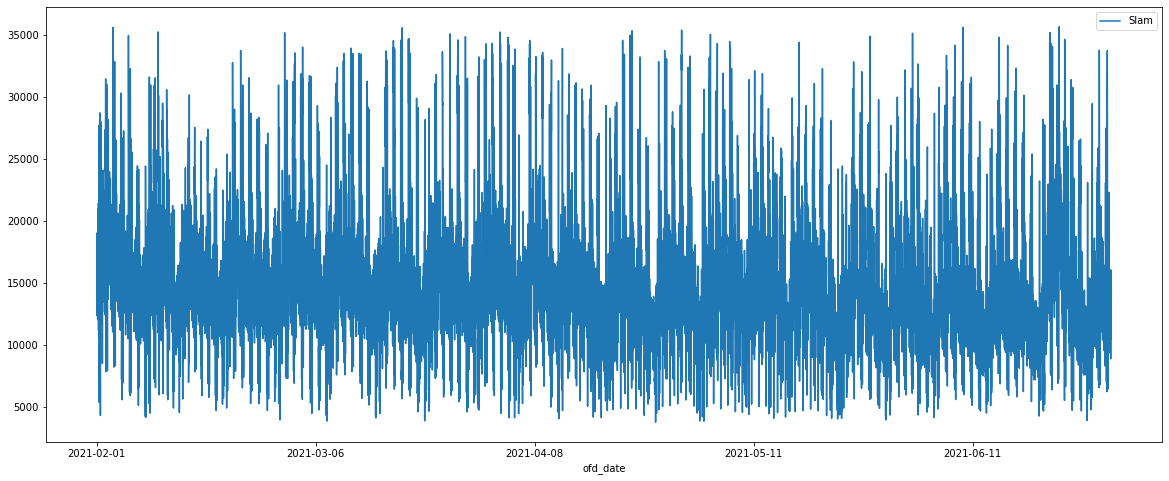

In [4]:
df.plot(x="ofd_date", y=["Slam"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

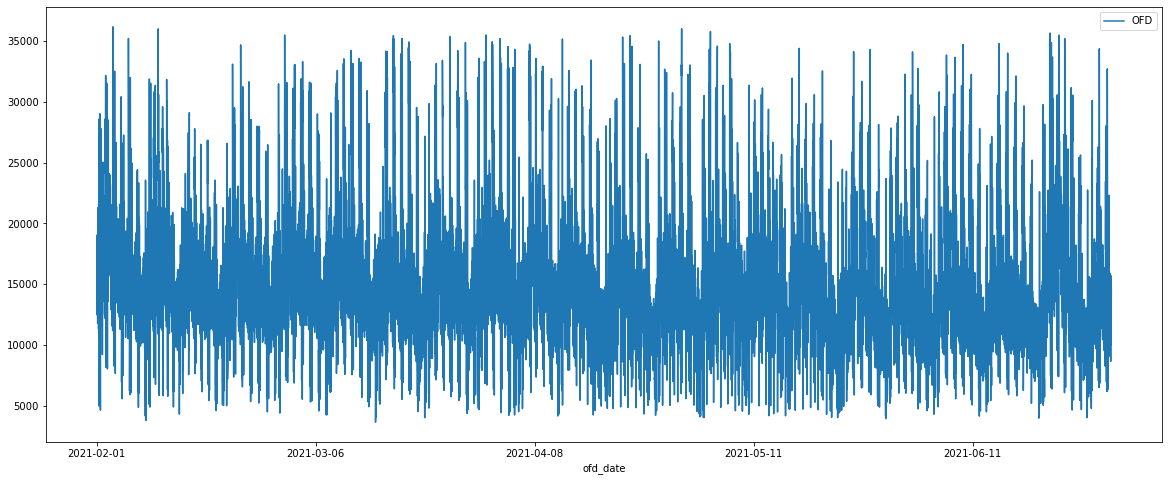

In [5]:
df.plot(x="ofd_date", y=["OFD"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

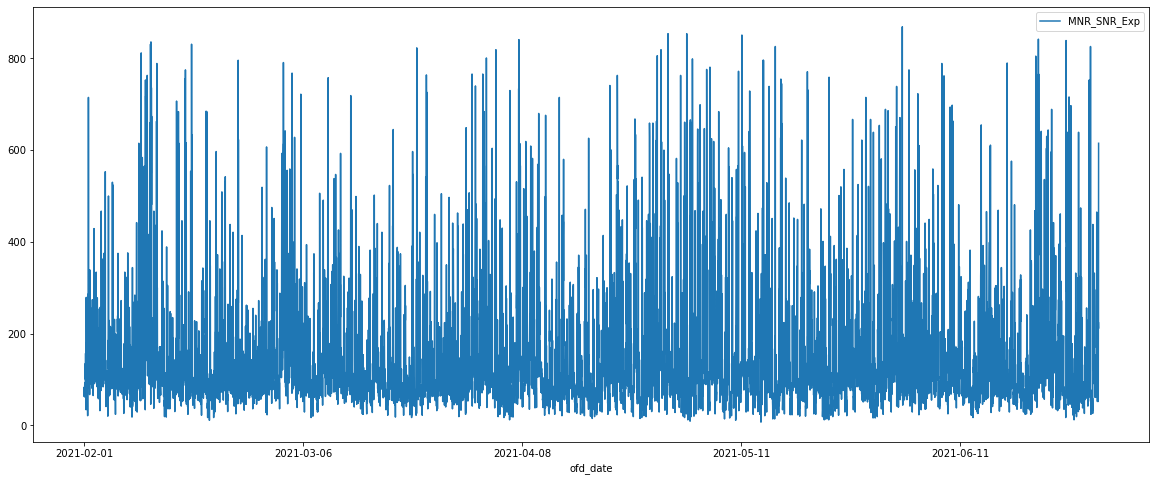

In [6]:
df.plot(x="ofd_date", y=["MNR_SNR_Exp"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

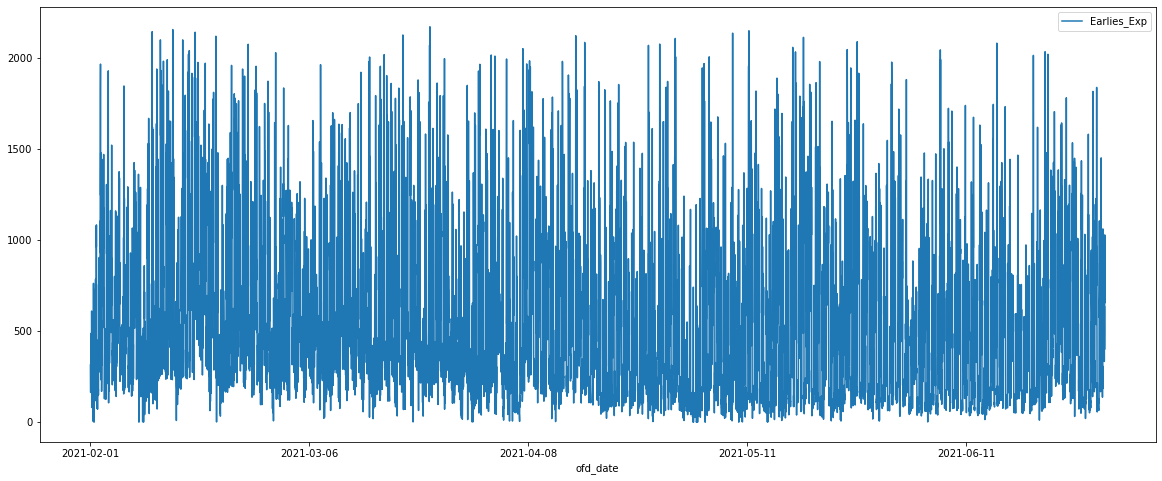

In [7]:
df.plot(x="ofd_date", y=["Earlies_Exp"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

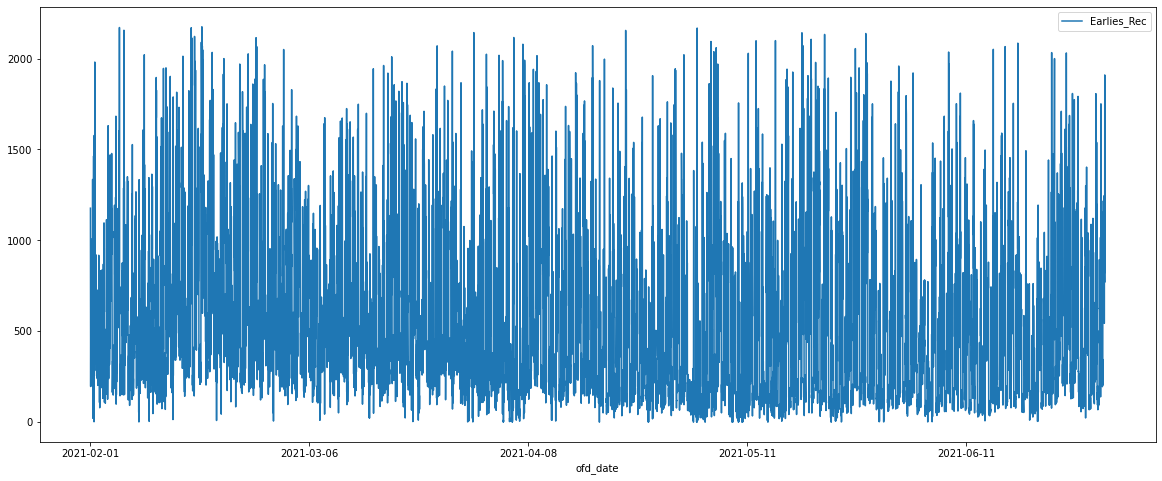

In [8]:
df.plot(x="ofd_date", y=["Earlies_Rec"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

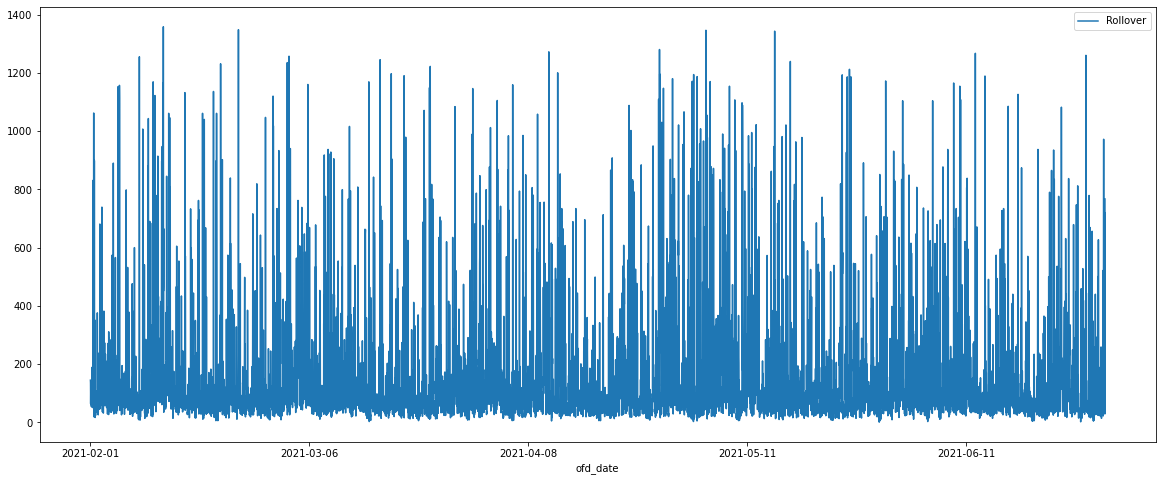

In [9]:
df.plot(x="ofd_date", y=["Rollover"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

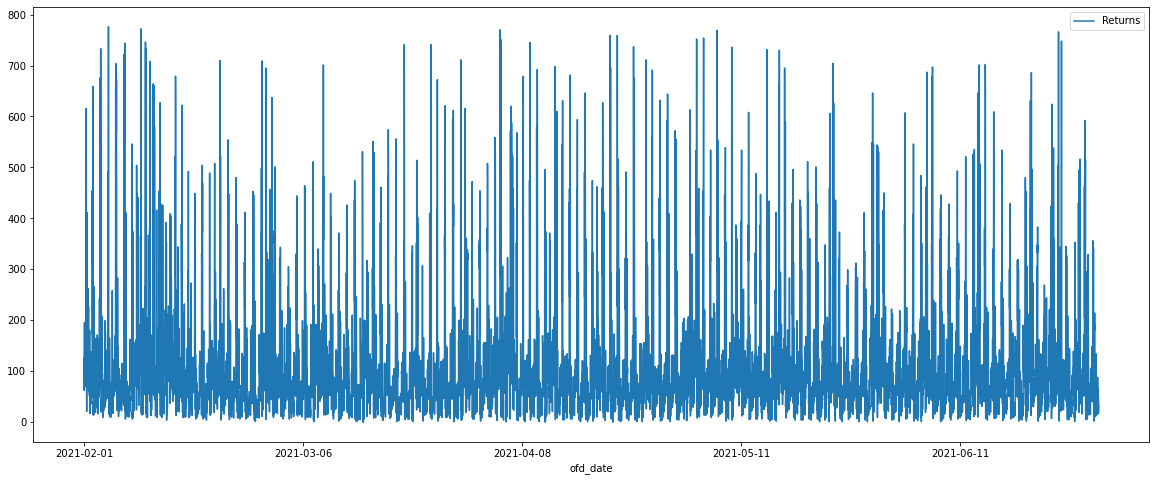

In [10]:
df.plot(x="ofd_date", y=["Returns"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

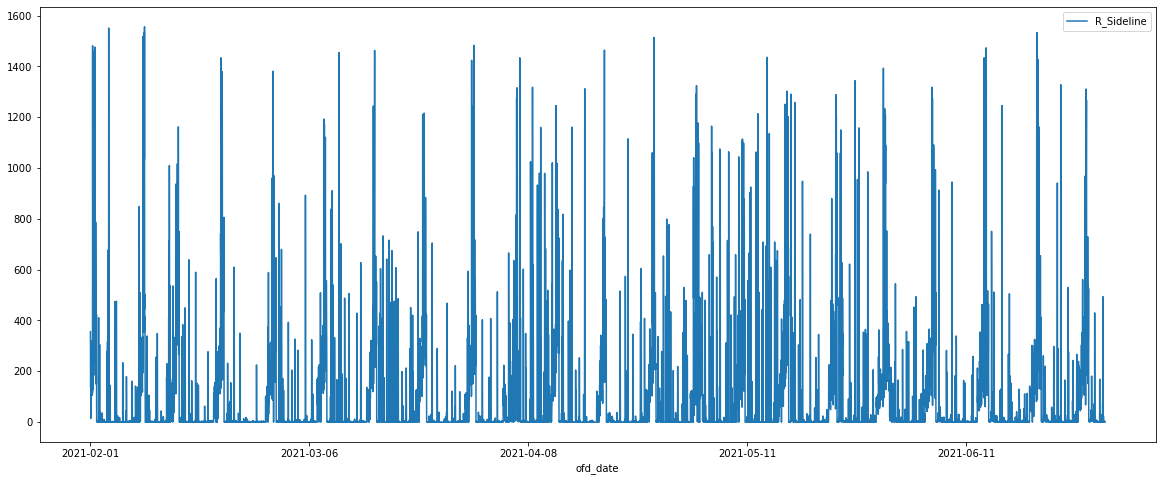

In [11]:
df.plot(x="ofd_date", y=["R_Sideline"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

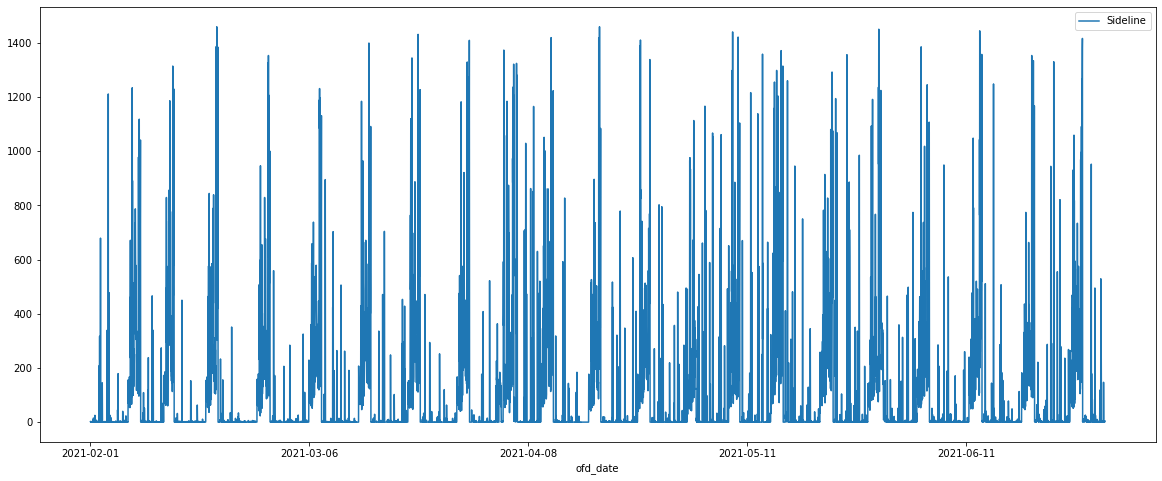

In [12]:
df.plot(x="ofd_date", y=["Sideline"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

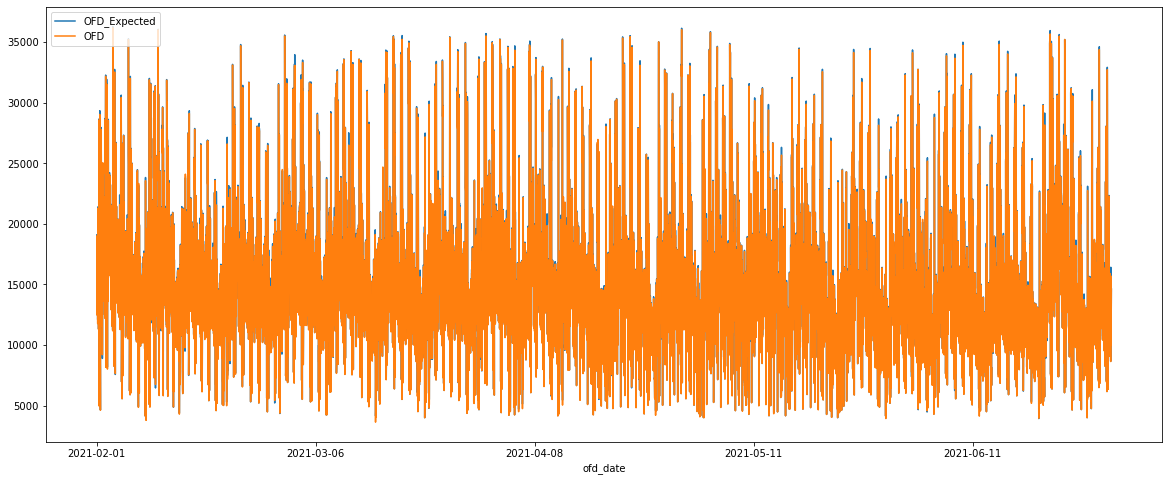

In [13]:
df.plot(x="ofd_date", y=["OFD_Expected","OFD"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

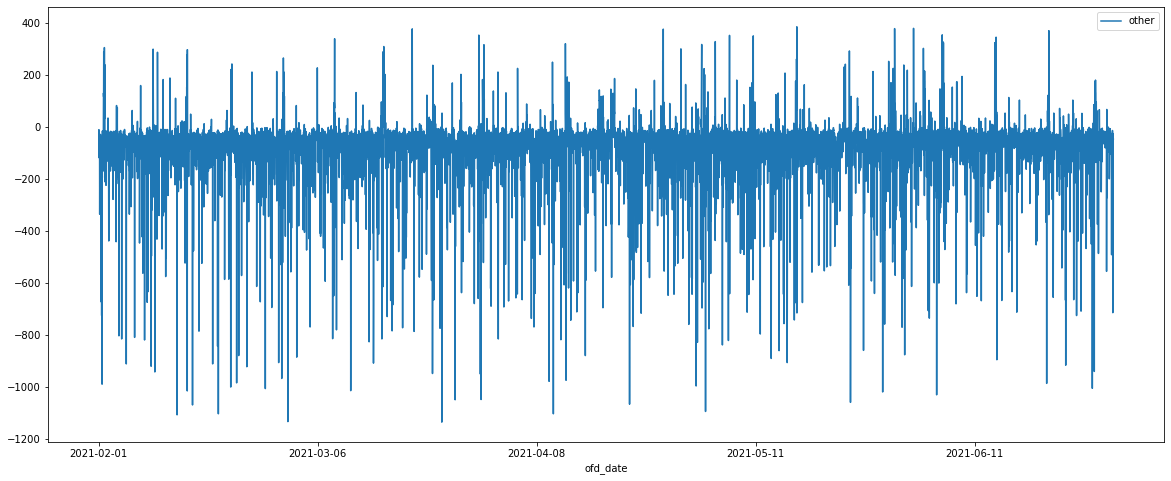

In [14]:
df.plot(x="ofd_date", y="other", figsize=(20,8))

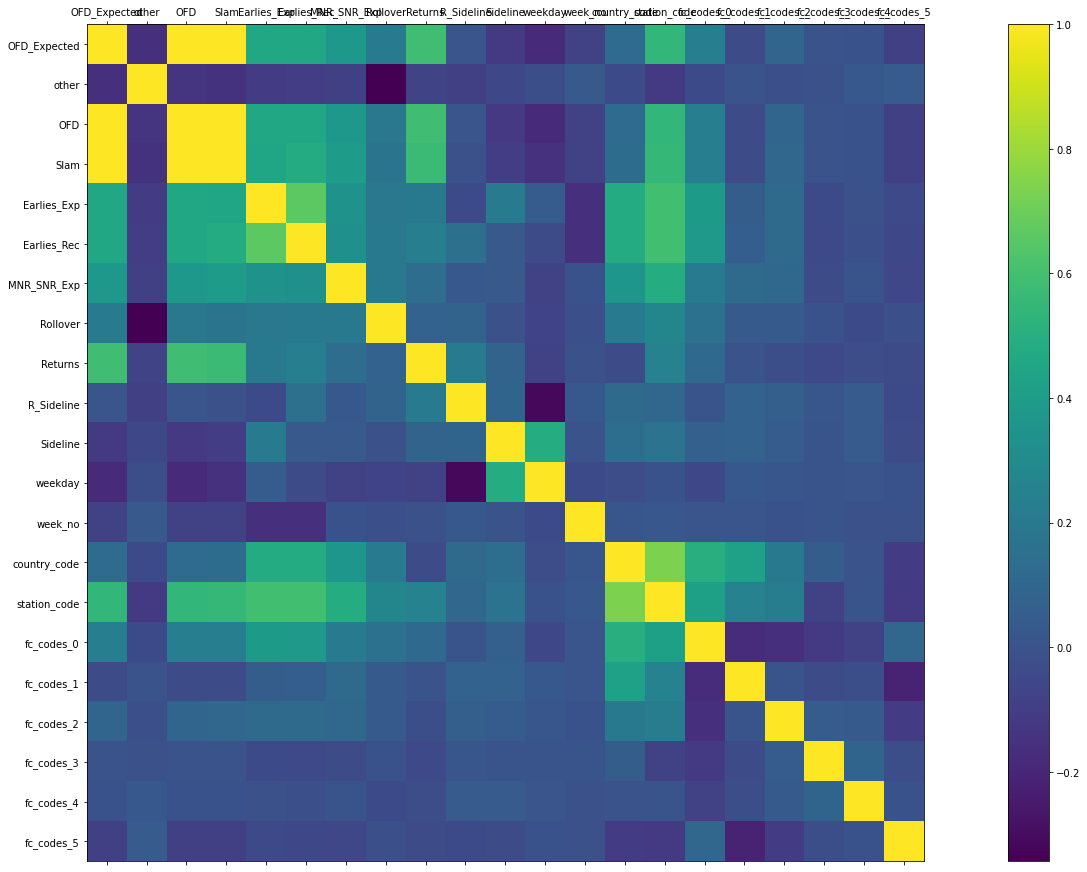

In [9]:
corr = df.corr(method = "pearson")
plt.matshow(corr)
cb = plt.colorbar()
plt.gcf().set_size_inches(30, 15)
plt.xticks(ticks=range(21), labels=corr.columns.values)
plt.yticks(ticks=range(21), labels=corr.columns.values)
corr.to_csv("../Data/Final/correlation_matrix_MNR.csv")

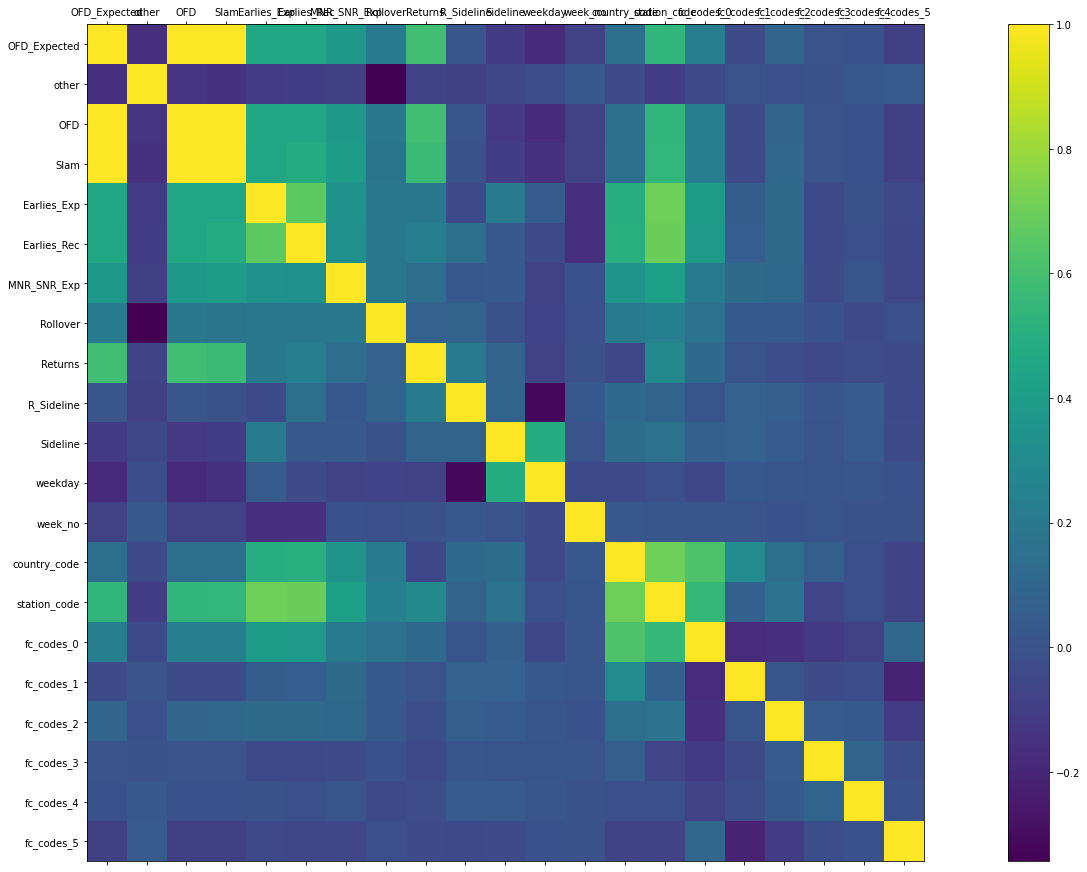

In [10]:
corr = df_Earl.corr(method = "pearson")
plt.matshow(corr)
cb = plt.colorbar()
plt.gcf().set_size_inches(30, 15)
plt.xticks(ticks=range(21), labels=corr.columns.values)
plt.yticks(ticks=range(21), labels=corr.columns.values)
corr.to_csv("../Data/Final/correlation_matrix_Earl.csv")